In [232]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
from all_funcs import mod_df
from all_funcs import add_factor
from all_funcs import three_graphs_one_plot
from all_funcs import fac_plots
from all_funcs import cap_outliers_by_list
from all_funcs import find_outliers_IQR
from all_funcs import ult_analysis
from all_funcs import test_mannwhitneyu
from all_funcs import siegel_tukey
from all_funcs import get_corr
from all_funcs import plot_pred
from all_funcs import train_test_split
from all_funcs import series_to_supervised
from all_funcs import pred_val
from all_funcs import graphs
from all_funcs import make_autocorr_plot
from all_funcs import make_autocorr_plot
# from all_funcs import persistence
# from all_funcs import make_forecasts
# from all_funcs import evaluate_forecasts
# from all_funcs import plot_forecasts
# from all_funcs import split_into_sequences
# from all_funcs import get_train_test_sets
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from numpy import set_printoptions
from sklearn.ensemble import RandomForestRegressor
from lineartree import LinearBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [233]:
dfs = []
for name in ['datasets\россия,-29006.xlsx', 'datasets\россия,-29007.xlsx' , 'datasets\россия,-29013.xlsx']:
  dfs.append(mod_df(name))

In [234]:
for i in range(len(dfs)):
  for name in ['datasets/rucbitr3+.xlsx', 'datasets/rucbcp3a3yns.xlsx',  'datasets/indexes.xlsx', 'datasets/ставка-ruonia.xlsx', 'datasets/usd_rub-(fx) (1).xlsx',
              'datasets/corp_bonds_volume.xlsx', 'datasets/cpi.xlsx', 'datasets/inflation.xlsx', 'datasets/rub-yield-curve-10y (1).xlsx',
               'datasets/ofz_volume.xlsx',  'datasets/umemployment.xlsx']:
    dfs[i] = add_factor(dfs[i], name)
    dfs[i]['key_0'] = pd.to_datetime(dfs[i]['key_0'])
    dfs[i] = dfs[i].set_index('key_0')

In [235]:
dfs[0]

,Indicative,YTM Indicative,G-spread,t,ISIN,name,RUCBITR3+,RUCBCP3A3YNS,indexes,Ставка RUONIA,USD/RUB (FX),"Объем рынка корпоративных облигаций - Россия, RUB",Россия базовые потребительские цены,Россия уровень инфляции в годовом выражении,RUB Yield Curve 10Y,"Объем рынка ОФЗ - Россия, RUB",Россия уровень безработицы
key_0,,,,,,,,,,,,,,,,,
2022-01-03,101.1200,12.9511,469.994254,1,RU000A0JV4L2,"datasets\россия,-29006.xlsx",579.67,100.51,9.5,8.04,74.58064,17569.19,100.8,8.73,8.3678,15609.31,4.4
2022-01-04,101.1200,12.9589,471.367256,2,RU000A0JV4L2,"datasets\россия,-29006.xlsx",581.62,100.72,9.5,8.04,75.16675,17569.19,100.8,8.73,8.3704,15609.31,4.4
2022-01-05,101.1005,12.9749,474.511353,3,RU000A0JV4L2,"datasets\россия,-29006.xlsx",582.30,100.80,9.5,8.04,76.11534,17569.19,100.8,8.73,8.3386,15609.31,4.4
2022-01-06,101.1200,12.9745,448.226215,4,RU000A0JV4L2,"datasets\россия,-29006.xlsx",581.72,100.56,9.5,8.04,76.43210,17569.19,100.8,8.73,8.4660,15609.31,4.4
2022-01-07,101.1500,12.9693,447.715279,5,RU000A0JV4L2,"datasets\россия,-29006.xlsx",580.31,100.32,9.5,8.04,75.27871,17569.19,100.8,8.73,8.5759,15609.31,4.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-13,101.3200,8.1121,-2.650163,435,RU000A0JV4L2,"datasets\россия,-29006.xlsx",626.14,101.55,7.5,7.02,75.55000,21262.38,100.1,3.50,10.7822,18737.62,3.5
2023-03-14,101.3135,8.1147,-4.339735,436,RU000A0JV4L2,"datasets\россия,-29006.xlsx",626.41,101.56,7.5,7.14,75.75000,21262.38,100.1,3.50,10.8069,18737.62,3.5
2023-03-15,101.2625,8.1440,1.323858,437,RU000A0JV4L2,"datasets\россия,-29006.xlsx",626.72,101.59,7.5,7.29,76.42500,21262.38,100.1,3.50,10.8428,18737.62,3.5


In [236]:
dfs[0].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 439 entries, 2022-01-03 to 2023-03-17
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Indicative                                         439 non-null    float64
 1   YTM Indicative                                     439 non-null    float64
 2   G-spread                                           439 non-null    float64
 3   t                                                  439 non-null    int64  
 4   ISIN                                               439 non-null    object 
 5   name                                               439 non-null    object 
 6   RUCBITR3+                                          439 non-null    float64
 7   RUCBCP3A3YNS                                       439 non-null    float64
 8   indexes                                            439 non-null    floa

In [237]:
three_graphs_one_plot([dfs[0], dfs[1], dfs[2]])

TypeError: three_graphs_one_plot() missing 2 required positional arguments: 'df2' and 'df3'

In [ ]:
df_alph_full = dfs[0][dfs[0].index >= '2022-05-01']
df_alph_full['t'] = [i for i in range(len(df_alph_full))]

C:\Temp\ipykernel_1084\613649094.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_alph_full['t'] = [i for i in range(len(df_alph_full))]


<AxesSubplot:xlabel='key_0'>

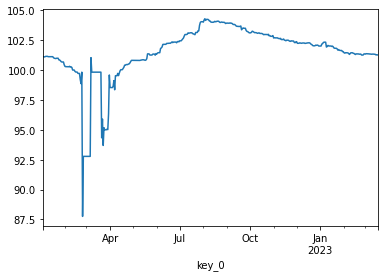

In [ ]:
dfs[0]['Indicative'].plot()
plt.ylabel("Цена,  RUB")
plt.xlabel("Дата")

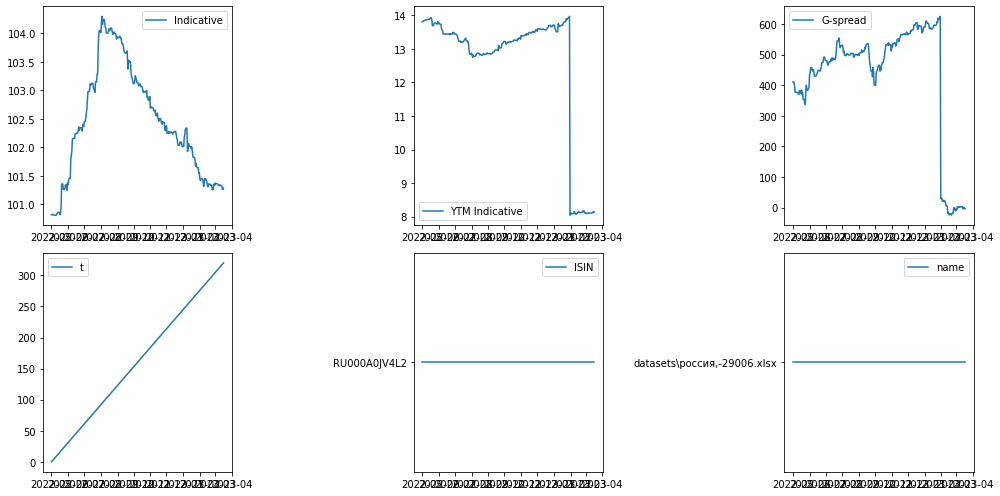

In [ ]:
fac_plots(df_alph_full)

In [ ]:
df_alph = df_alph_full.copy()

In [ ]:
outliers = {}
for name in df_alph.select_dtypes(include = numerics).columns:
  outliers['{}'.format(name)] = find_outliers_IQR(df_alph[name])

for name in df_alph.select_dtypes(include = numerics).columns:
  if len(outliers[name]) > 0:
    df_alph[name] = cap_outliers_by_list(df_alph[name])

for name in df_alph.select_dtypes(include = numerics).columns:
    df_alph.loc[df_alph[('2022-09'<df_alph.index) & (df_alph.index<='2022-12')].index, name] = cap_outliers_by_list(df_alph.loc[df_alph[('2022-09'<df_alph.index) & (df_alph.index<='2022-12')].index, name])

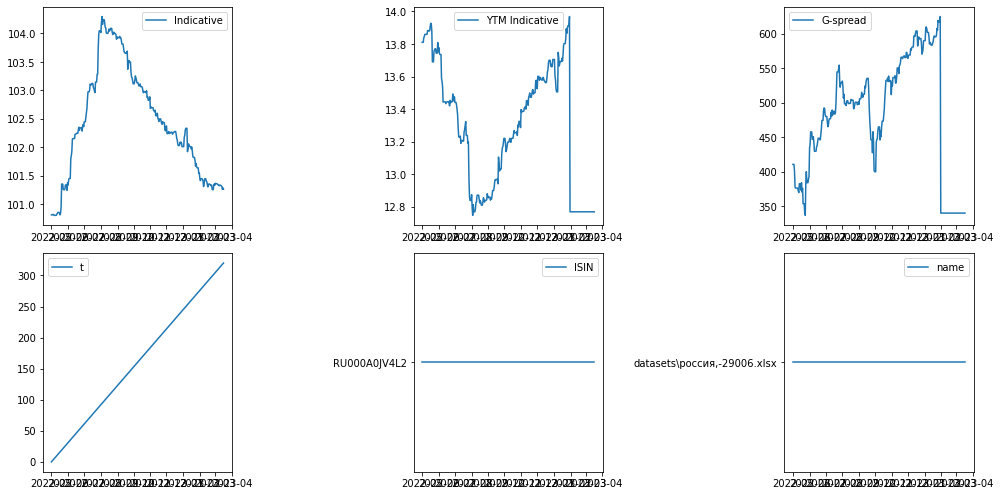

In [ ]:
fac_plots(df_alph)

MSE = 0.003421


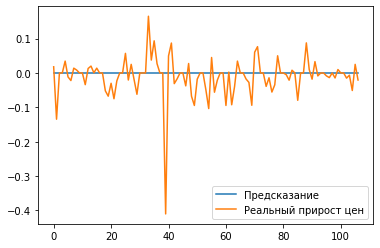

In [ ]:
#Trivial model

pred_val((df_alph['Indicative'][213:] - df_alph['Indicative'][213:].shift(1)).dropna(), [0 for i in range(107)])

### Linear models

In [ ]:
siegel_tukey(df_alph['Indicative'])
test_mannwhitneyu(df_alph['Indicative'])

z value: -7.481
Probably different distributions
stat=1.82e+04, p=1.82e+04
Probably different distributions


In [ ]:
df_alph['Indicative'] = df_alph['Indicative'] - df_alph['Indicative'].shift(1)
df_alph_uni = df_alph[['Indicative', 't']]
df_alph_uni = df_alph_uni[1:]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_alph_uni['t'], df_alph_uni['Indicative'], 107)

In [ ]:
import statsmodels.api as sm

X_lm = sm.add_constant(X_train)
regr = sm.OLS(y_train, X_lm)
regr2 = regr.fit()
print(regr2.summary())

                            OLS Regression Results                            
Dep. Variable:             Indicative   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     14.61
Date:                Sat, 03 Jun 2023   Prob (F-statistic):           0.000174
Time:                        15:13:10   Log-Likelihood:                 251.15
No. Observations:                 213   AIC:                            -498.3
Df Residuals:                     211   BIC:                            -491.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0413      0.010      4.019      0.0

MSE = 0.004565


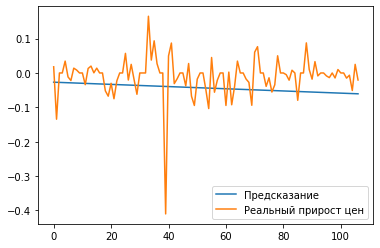

In [ ]:

prediction = regr2.predict(sm.add_constant(X_test))

print('MSE = %.4g' % mean_squared_error(y_test, prediction))

plot_pred(prediction, y_test)

### ARIMA

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


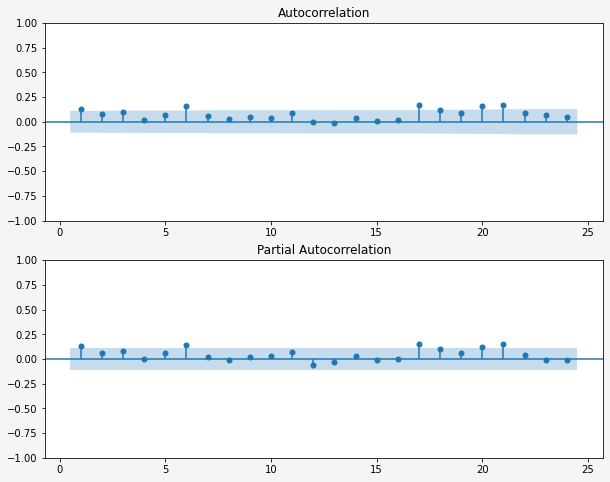

In [ ]:
make_autocorr_plot(df_alph_uni['Indicative'])

In [ ]:
train = df_alph_uni['Indicative'][:213]
test = df_alph_uni['Indicative'][213:]

In [ ]:
arima_model = ARIMA(train, order = (2,0,0))
model = arima_model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:             Indicative   No. Observations:                  213
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 247.373
Date:                Sat, 03 Jun 2023   AIC                           -486.746
Time:                        15:13:11   BIC                           -473.301
Sample:                    05-02-2022   HQIC                          -481.312
                         - 11-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0073      0.008      0.933      0.351      -0.008       0.023
ar.L1          0.1383      0.054      2.564      0.010       0.033       0.244
ar.L2          0.0892      0.081      1.099      0.2

c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


MSE = 0.00364


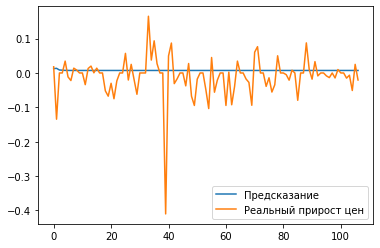

In [ ]:
prediction = model.forecast(107)

print('MSE = %.4g' % mean_squared_error(test, prediction))

plot_pred(prediction, test)

### LSTM

In [ ]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
 n_vars = 1 if type(data) is list else data.shape[1]
 df = pd.DataFrame(data)
 cols, names = list(), list()
 # input sequence (t-n, ... t-1)
 for i in range(n_in, 0, -1):
  cols.append(df.shift(i))
 names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
 # forecast sequence (t, t+1, ... t+n)
 for i in range(0, n_out):
  cols.append(df.shift(-i))
 if i == 0:
  names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
 else:
  names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
 # put it all together
 agg = pd.concat(cols, axis=1)
 agg.columns = names
 # drop rows with NaN values
 if dropnan:
  agg.dropna(inplace=True)
 return agg


def persistence(last_ob, n_seq):
 return [last_ob for i in range(n_seq)]

# evaluate the persistence model
def make_forecasts(train, test, n_lag, n_seq):
	forecasts = list()
	for i in range(len(test)):
		X, y = test[i, 0:n_lag], test[i, n_lag:]
		# make forecast
		forecast = persistence(X[-1], n_seq)
		# store the forecast
		forecasts.append(forecast)
	return forecasts

# evaluate the RMSE for each forecast time step
def evaluate_forecasts(test, forecasts, n_lag, n_seq):
	for i in range(n_seq):
		actual = test[:,(n_lag+i)]
		predicted = [forecast[i] for forecast in forecasts]
		rmse = np.sqrt(mean_squared_error(actual, predicted))
		print('t+%d RMSE: %f' % ((i+1), rmse))
                
# plot the forecasts in the context of the original dataset
def plot_forecasts(series, forecasts, n_test):
	# plot the entire dataset in blue
	plt.plot(series.values)
	# plot the forecasts in red
	for i in range(len(forecasts)):
		off_s = len(series) - n_test + i
		off_e = off_s + len(forecasts[i])
		xaxis = [x for x in range(off_s, off_e)]
		plt.plot(xaxis, forecasts[i], color='red')
	# show the plot
	plt.show()

In [ ]:
def split_into_sequences(data, seq_len):
    n_seq = len(data) - seq_len + 1
    return np.array([data[i:(i+seq_len)] for i in range(n_seq)])

def get_train_test_sets(data, seq_len, train_frac):
    sequences = split_into_sequences(data, seq_len)
    n_train = int(sequences.shape[0] * train_frac)
    X_train = sequences[:n_train, :-1, :]
    y_train = sequences[:n_train, -1, :]
    X_test = sequences[n_train:, :-1, :]
    y_test = sequences[n_train:, -1, :]
    return X_train, y_train, X_test, y_test

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# fit the format of the scaler -> convert shape from (1000, ) -> (1000, 1)
price = df_alph['Indicative'].values.reshape(-1, 1)
scaled_price = scaler.fit_transform(price)

In [ ]:
seq_len = 50

x_train, y_train, x_test, y_test = get_train_test_sets(scaled_price, seq_len, train_frac=0.61)
# x_train, y_train, x_test, y_test = get_train_test_sets(df_alph['Indicative'].values.reshape(-1, 1), seq_len, train_frac=0.525)


In [ ]:
len(y_test)

107

In [ ]:
# fraction of the input to drop; helps prevent overfitting
dropout = 0.2
window_size = seq_len - 1

# build a 3-layer LSTM RNN
model = keras.Sequential()

model.add(
    LSTM(window_size, return_sequences=True, 
         input_shape=(window_size, x_train.shape[-1]))
)

model.add(Dropout(rate=dropout))
# Bidirectional allows for training of sequence data forwards and backwards
model.add(
    Bidirectional(LSTM((window_size * 2), return_sequences=True)
)) 

model.add(Dropout(rate=dropout))
model.add(
    Bidirectional(LSTM(window_size, return_sequences=False))
) 

model.add(Dense(units=1))
# linear activation function: activation is proportional to the input
model.add(Activation('linear'))

In [ ]:
x_train = x_train[1:]
y_train = y_train[1:]

In [ ]:
batch_size = 15

model.compile(
    loss='mean_squared_error',
    optimizer='adam'
)

history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=batch_size,
    shuffle=False,
    validation_split=0.2
)

Epoch 1/10
9/9 [==============================] - 8s 236ms/step - loss: 0.0843 - val_loss: 0.0054
Epoch 2/10
9/9 [==============================] - 1s 61ms/step - loss: 0.0125 - val_loss: 0.0045
Epoch 3/10
9/9 [==============================] - 1s 61ms/step - loss: 0.0088 - val_loss: 0.0057
Epoch 4/10
9/9 [==============================] - 1s 61ms/step - loss: 0.0093 - val_loss: 0.0040
Epoch 5/10
9/9 [==============================] - 1s 61ms/step - loss: 0.0079 - val_loss: 0.0044
Epoch 6/10
9/9 [==============================] - 1s 62ms/step - loss: 0.0085 - val_loss: 0.0037
Epoch 7/10
9/9 [==============================] - 1s 61ms/step - loss: 0.0079 - val_loss: 0.0039
Epoch 8/10
9/9 [==============================] - 1s 60ms/step - loss: 0.0085 - val_loss: 0.0038
Epoch 9/10
9/9 [==============================] - 1s 61ms/step - loss: 0.0082 - val_loss: 0.0038
Epoch 10/10
9/9 [==============================] - 1s 61ms/step - loss: 0.0083 - val_loss: 0.0040


In [ ]:
y_pred = model.predict(x_test)

# invert the scaler to get the absolute price data
y_test_orig = scaler.inverse_transform(y_test)
y_pred_orig = scaler.inverse_transform(y_pred)

MSE = 0.003579


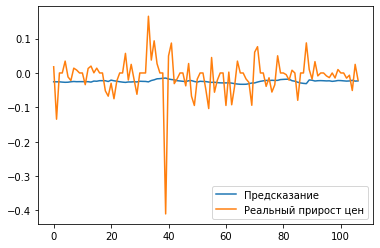

In [ ]:
pred_val(y_test_orig, y_pred_orig)

### Multivariate models

In [ ]:
df_alph = df_alph_full.copy()
df_alph = df_alph.select_dtypes(include=numerics)

In [ ]:
df_alph.head(5)

,Indicative,YTM Indicative,G-spread,t,RUCBITR3+,RUCBCP3A3YNS,indexes,Ставка RUONIA,USD/RUB (FX),"Объем рынка корпоративных облигаций - Россия, RUB",Россия базовые потребительские цены,Россия уровень инфляции в годовом выражении,RUB Yield Curve 10Y,"Объем рынка ОФЗ - Россия, RUB",Россия уровень безработицы
key_0,,,,,,,,,,,,,,,
2022-05-01,100.8145,13.8102,410.382466,0,538.48,95.73,14.0,13.68,73.35063,16888.34,100.4,17.1,10.3203,15723.28,3.9
2022-05-02,100.8145,13.8102,410.382466,1,538.48,95.73,14.0,13.68,70.92121,16888.34,100.4,17.1,10.3203,15723.28,3.9
2022-05-03,100.8145,13.8102,410.382466,2,538.48,95.73,14.0,13.68,68.13433,16888.34,100.4,17.1,10.3203,15723.28,3.9
2022-05-04,100.8235,13.8381,400.315639,3,538.48,95.73,14.0,13.68,66.08850,16888.34,100.4,17.1,10.3203,15723.28,3.9
2022-05-05,100.8215,13.8455,377.537108,4,537.53,95.75,11.0,14.00,65.88899,16888.34,100.4,17.1,10.4369,15723.28,3.9


In [ ]:
outliers = {}
for name in df_alph.select_dtypes(include = numerics).columns:
  outliers['{}'.format(name)] = find_outliers_IQR(df_alph[name])

for name in df_alph.select_dtypes(include = numerics).columns:
  if len(outliers[name]) > 0:
    df_alph[name] = cap_outliers_by_list(df_alph[name])

for name in df_alph.select_dtypes(include = numerics).columns:
    df_alph.loc[df_alph[('2022-09'<df_alph.index) & (df_alph.index<='2022-12')].index, name] = cap_outliers_by_list(df_alph.loc[df_alph[('2022-09'<df_alph.index) & (df_alph.index<='2022-12')].index, name])

In [ ]:
df_alph = (df_alph - df_alph.shift(1)).dropna()

In [ ]:
for name in df_alph.select_dtypes(include = numerics).columns:
    df_alph.loc[df_alph[('2022-08-30'<df_alph.index) & (df_alph.index<='2022-12')].index, name] = cap_outliers_by_list(df_alph.loc[df_alph[('2022-08-30'<df_alph.index) & (df_alph.index<='2022-12')].index, name])

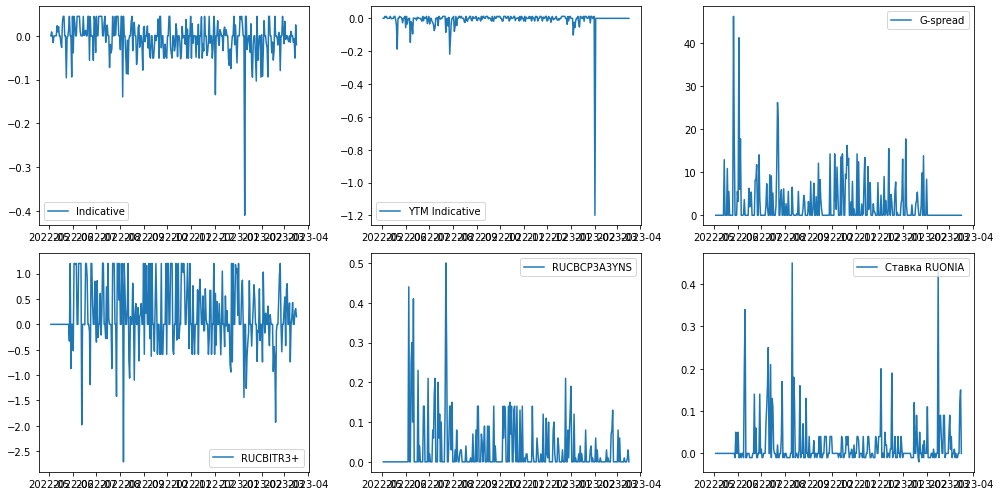

In [ ]:
fac_plots(df_alph.drop(['t', 'indexes'], axis = 1))

In [ ]:
df_alph['t'] = [i for i in range(len(df_alph))]

In [ ]:
df_alph.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 320 entries, 2022-05-02 to 2023-03-17
Data columns (total 15 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Indicative                                         320 non-null    float64
 1   YTM Indicative                                     320 non-null    float64
 2   G-spread                                           320 non-null    float64
 3   t                                                  320 non-null    int64  
 4   RUCBITR3+                                          320 non-null    float64
 5   RUCBCP3A3YNS                                       320 non-null    float64
 6   indexes                                            320 non-null    float64
 7   Ставка RUONIA                                      320 non-null    float64
 8   USD/RUB (FX)                                       320 non-null    floa

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 320 entries, 2022-05-02 to 2023-03-17
Data columns (total 15 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Indicative                                         320 non-null    float64
 1   YTM Indicative                                     320 non-null    float64
 2   G-spread                                           320 non-null    float64
 3   t                                                  320 non-null    int64  
 4   RUCBITR3+                                          320 non-null    float64
 5   RUCBCP3A3YNS                                       320 non-null    float64
 6   indexes                                            320 non-null    float64
 7   Ставка RUONIA                                      320 non-null    float64
 8   USD/RUB (FX)                                       320 non-null    floa

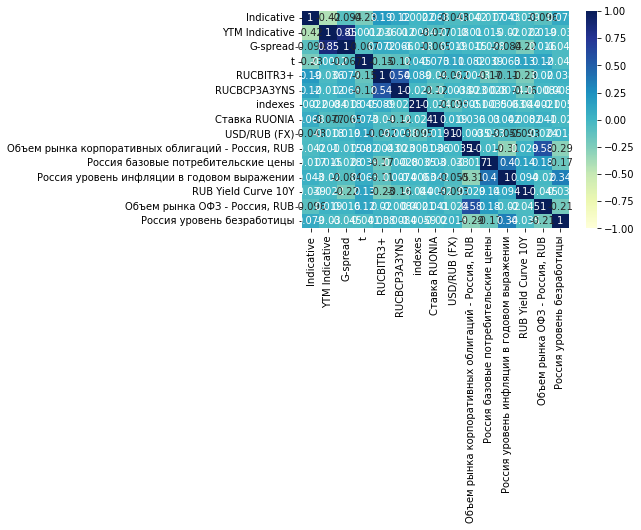

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ - 4
key_0
2022-05-19    0.1025
2022-05-20    0.4070
2022-05-23   -0.0960
2022-05-27    0.0705
2022-05-30   -0.0940
2022-05-31    0.1315
2022-06-02    0.0860
2022-06-06    0.3460
2022-06-08    0.0785
2022-06-09    0.2100
2022-06-14    0.0770
2022-06-28    0.0805
2022-07-01    0.0845
2022-07-04    0.0780
2022-07-06    0.0925
2022-07-07    0.1655
2022-07-08    0.1270
2022-07-12    0.1040
2022-07-22    0.1845
2022-07-25    0.1360
2022-07-27    0.4530
2022-07-28    0.2460
2022-08-02    0.1740
2022-08-03    0.1075
2022-08-04   -0.1395
2022-08-05    0.0850
2022-08-09   -0.0865
2022-08-11   -0.0880
2022-08-30   -0.0785
2022-09-21    0.0765
2022-09-22    0.0780
2022-10-04    0.0850
2022-12-02   -0.1345
2022-12-22   -0.0750
2023-01-03    0.1650
2023-01-05    0.0935
2023-01-09   -0.4100
2023-01-11    0.0870
2023-01-19   -0.0945
2023-01-24   -0.1035
2023-01-30   -0.0945
2023-02-01   -0.0925
2023-02-08   -0.0940
2023-02-10    0.0765
2023-02-24

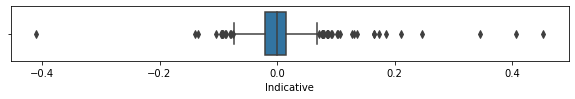

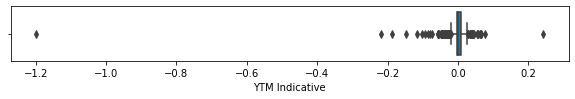

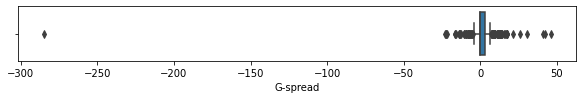

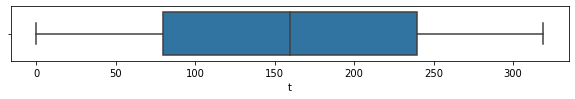

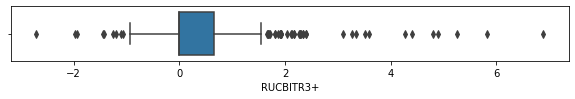

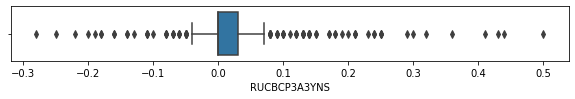

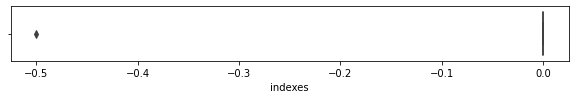

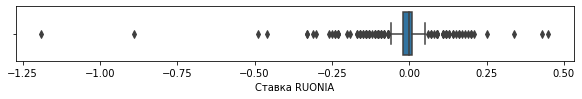

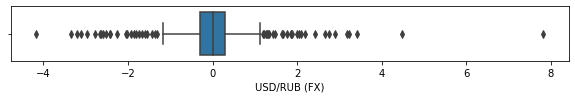

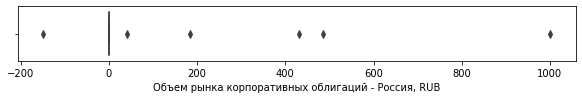

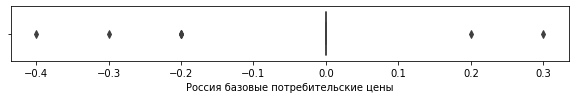

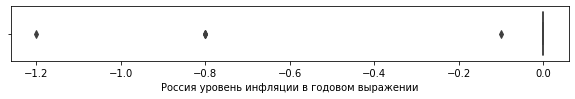

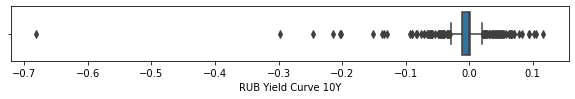

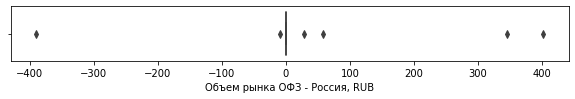

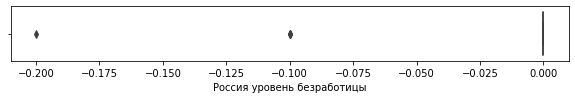

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ - 6


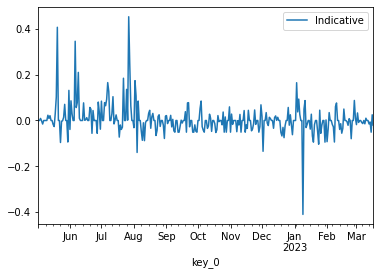

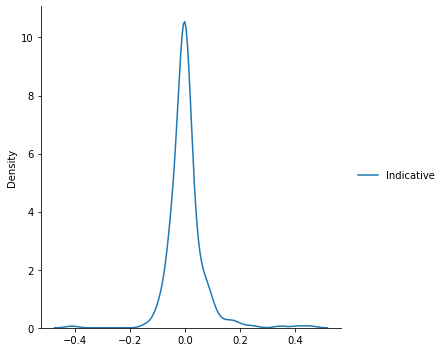

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ - 7
Тест Jarque Bera
        JB         p-value        skew             kurtosis     
----------------------------------------------------------------
3767.6829151585102     0.0 1.7193094983073425 19.454547032143086
----------------------------------------------------------------

Тест Шапиро-Уилк
Statistics=0.747, p-value=0.000
Отклонить гипотезу о нормальности
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ - 8
Тест Jarque Bera
        JB         p-value        skew             kurtosis     
----------------------------------------------------------------
3767.6829151585102     0.0 1.7193094983073425 19.454547032143086
----------------------------------------------------------------

Тест Шапиро-Уилк
Statistics=0.747, p-value=0.000
Отклонить гипотезу о нормальности
None


c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


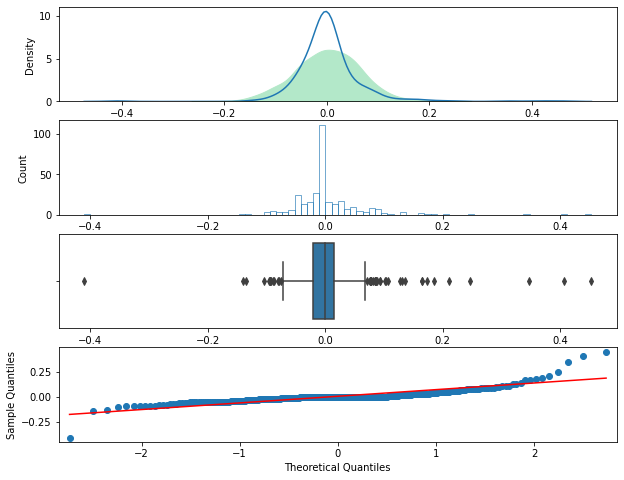

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ - 9


c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


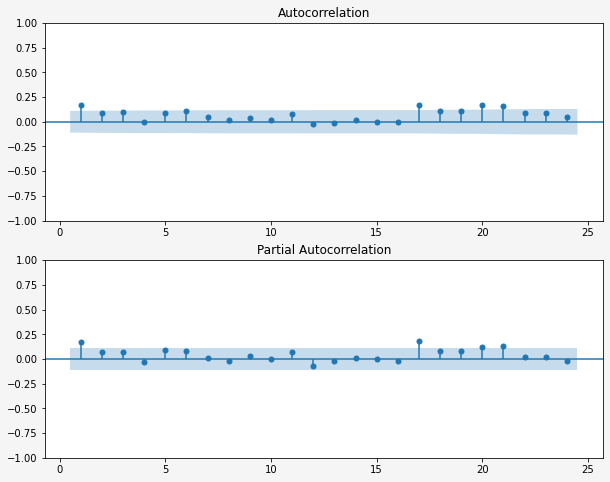

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ - 10
Тестирование средних. Статистика Стьюдента: 0.2894698649360379. Критическое значение: 1.6544935026291934
Тестирование дисперсий. Статистика Фишера: 0.42241762866877164. Критическое значение: 1.2991010723726828
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ - 11
excess kurtosis of normal distribution (should be 0): 16.454547032143086
skewness of normal distribution (should be 0): 1.7193094983073425


In [ ]:
ult_analysis(df_alph)

In [ ]:
siegel_tukey(df_alph['Indicative'])
test_mannwhitneyu(df_alph['Indicative'])

z value: -1.866
Probably the same distribution
stat=1.52e+04, p=1.52e+04
Probably different distributions


<AxesSubplot:>

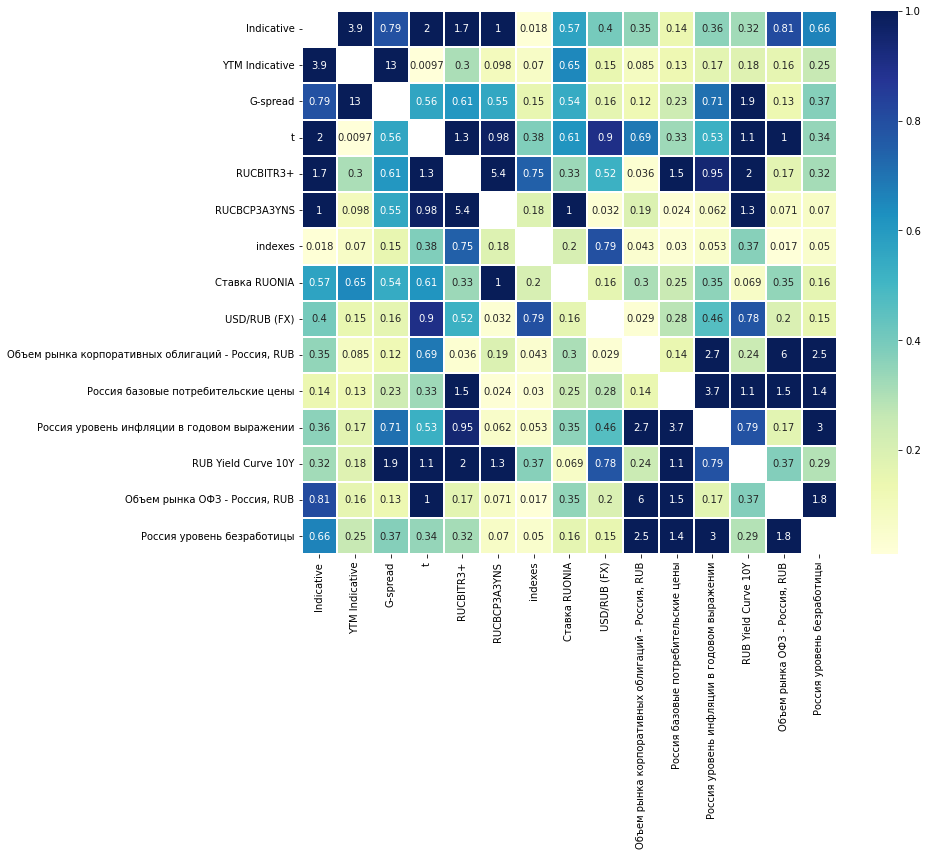

In [ ]:
corrmat = df_alph.corr(method='pearson')

corrmat_significance = np.abs(corrmat/np.sqrt(1-np.power(corrmat,2))*np.sqrt(70))
# corrmat_significance.values[[np.arange(corrmat_significance.shape[0])]*2] = 0

f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat_significance, ax=ax, cmap="YlGnBu", linewidths=0.1, annot=True, vmax=1)

### Feature selection

In [ ]:
for name in df_alph.drop('Indicative', axis = 1).columns:
    df_alph[name] = df_alph[name].shift(1)
df_alph = df_alph.dropna()

In [ ]:
X = df_alph.drop('Indicative', axis = 1).select_dtypes(include=numerics)
Y = df_alph['Indicative']

In [ ]:
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, Y)
set_printoptions(precision=3)
print(fit.scores_)

[15.117 11.828  0.973  0.903  0.567    inf  0.363  1.928 35.908  0.411
  3.643  0.822  1.639  5.217]


c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[177.145  16.27   35.965  18.401 132.882  19.645  96.738  19.607   7.084
  17.29   98.02   11.984 159.395  14.163]

In [ ]:
X.columns

Index(['YTM Indicative', 'G-spread', 't', 'RUCBITR3+', 'RUCBCP3A3YNS',
       'indexes', 'Ставка RUONIA', 'USD/RUB (FX)',
       'Объем рынка корпоративных облигаций - Россия, RUB',
       'Россия базовые потребительские цены',
       'Россия уровень инфляции в годовом выражении', 'RUB Yield Curve 10Y',
       'Объем рынка ОФЗ - Россия, RUB', 'Россия уровень безработицы'],
      dtype='object')

In [ ]:
# alph_feat = df_alph[['Indicative', 'YTM Indicative', 'G-spread', 'indexes', 'RUCBITR3+']]
alph_feat = df_alph[['Indicative', 'YTM Indicative', 'USD/RUB (FX)',
       'Объем рынка корпоративных облигаций - Россия, RUB']]

In [ ]:
alph_feat.head(2)

,Indicative,YTM Indicative,USD/RUB (FX),"Объем рынка корпоративных облигаций - Россия, RUB"
key_0,,,,
2022-05-03,0.000,0.0,-2.42942,0.0
2022-05-04,0.009,0.0,-2.78688,0.0


In [ ]:
len(df_alph)

319

## Modeling

### Random forest

In [ ]:
y = alph_feat['Indicative']
X = alph_feat.drop('Indicative', axis = 1)

In [ ]:
n_test = 107
X_train, X_test, y_train, y_test = X[:-n_test], X[-n_test:], y[:-n_test], y[-n_test:]

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from skopt.space import Real, Integer
from skopt.utils import use_named_args

n_features = X.shape[1]

reg = XGBRegressor(n_estimators=50, random_state=0)
space  = [Integer(1, 5, name='max_depth'),
          Real(10**-5, 10**0, "log-uniform", name='learning_rate'),
          Integer(1, n_features, name='max_features'),
          Integer(2, 100, name='min_samples_split'),
          Integer(1, 100, name='min_samples_leaf'),
          Integer(2, 100, name='n_estimators')]

@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X_train, y_train,  cv=5, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))

from skopt import gp_minimize
res_gp = gp_minimize(objective, space, n_calls=50, random_state=0)

print("Best score=%.4f" % res_gp.fun)

print("""Best parameters:
- max_depth=%d
- learning_rate=%.6f
- max_features=%d
- min_samples_split=%d
- min_samples_leaf=%d
- n_estimators=%d""" % (res_gp.x[0], res_gp.x[1],
                            res_gp.x[2], res_gp.x[3],
                            res_gp.x[4], res_gp.x[5]))


Best score=0.0471
Best parameters:
- max_depth=1
- learning_rate=0.065826
- max_features=1
- min_samples_split=100
- min_samples_leaf=100
- n_estimators=80


MSE = 0.004515


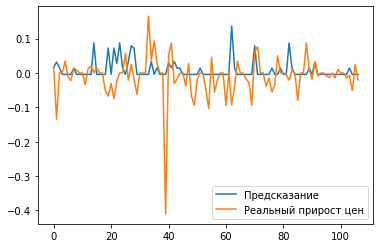

In [ ]:

regressor = XGBRegressor(max_depth=res_gp.x[0], learning_rate=res_gp.x[1], max_features=res_gp.x[2], min_samples_split=res_gp.x[3], min_samples_leaf=res_gp.x[4], n_estimators=res_gp.x[5])
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

pred_val(y_test, predictions)

In [ ]:
prediction = []
X_data = X_train.copy()
y_data = y_train.copy()
regressor = XGBRegressor(max_depth=res_gp.x[0], learning_rate=res_gp.x[1], max_features=res_gp.x[2], min_samples_split=res_gp.x[3], min_samples_leaf=res_gp.x[4], n_estimators=res_gp.x[5])
for t in X_test.index:
   model = (regressor.fit(X_data.values, y_data.values))
   pred = model.predict(X_test.loc[t])
   prediction.append(pred)
   X_data = X_data.append(X_test.loc[t])
   y_data.loc[t] = y_test.loc[t]

C:\Temp\ipykernel_1084\222577864.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
C:\Temp\ipykernel_1084\222577864.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
C:\Temp\ipykernel_1084\222577864.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
C:\Temp\ipykernel_1084\222577864.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  X_data = X_data.append(X_test.loc[t])
C:\Temp\ipykernel_1084\222577864.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

MSE = 0.01147


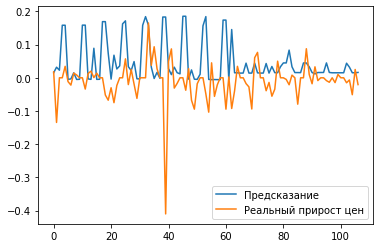

In [ ]:
pred_val(y_test, prediction)

In [ ]:
n_features = X.shape[1]

reg = RandomForestRegressor(n_estimators=50, random_state=0)
space  = [Integer(1, 5, name='max_depth'),
          Integer(1, n_features, name='max_features'),
          Integer(2, 100, name='min_samples_split'),
          Integer(1, 100, name='min_samples_leaf'),
          Integer(2, 100, name='n_estimators')]

@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X_train, y_train,  cv=5, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))

from skopt import gp_minimize
res_gp = gp_minimize(objective, space, n_calls=50, random_state=0)

print("Best score=%.4f" % res_gp.fun)

print("""Best parameters:
- max_depth=%d
- max_features=%d
- min_samples_split=%d
- min_samples_leaf=%d
- n_estimators=%d""" % (res_gp.x[0], res_gp.x[1],
                            res_gp.x[2], res_gp.x[3],
                            res_gp.x[4]))


Best score=0.0446
Best parameters:
- max_depth=2
- max_features=1
- min_samples_split=79
- min_samples_leaf=9
- n_estimators=100


MSE = 0.003603


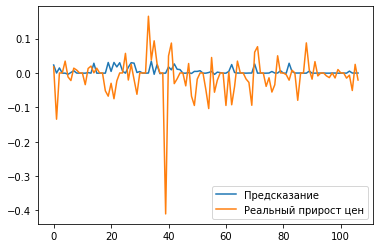

In [ ]:

regressor = RandomForestRegressor(max_depth=res_gp.x[0], max_features=res_gp.x[1], min_samples_split=res_gp.x[2], min_samples_leaf=res_gp.x[3], n_estimators=res_gp.x[4])
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

pred_val(y_test, predictions)

In [ ]:
# prediction = []
# X_data = X_train.copy()
# y_data = y_train.copy()
# regressor = RandomForestRegressor(max_depth=1, max_features=2, min_samples_split=100, min_samples_leaf=21, n_estimators=100)
# for t in X_test.index:
#    model = (regressor.fit(X_data.values, y_data.values))
#    pred = model.predict(X_test.loc[t].reshape(1, -1))
#    prediction.append(pred)
#    X_data = X_data.append(X_test.loc[t])
#    y_data.loc[t] = y_test.loc[t]

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

n_features = X.shape[1]

reg = GradientBoostingRegressor(n_estimators=50, random_state=0)
space  = [Integer(1, 5, name='max_depth'),
          Real(10**-5, 10**0, "log-uniform", name='learning_rate'),
          Integer(1, n_features, name='max_features'),
          Integer(2, 100, name='min_samples_split'),
          Integer(1, 100, name='min_samples_leaf'),
          Integer(2, 100, name='n_estimators')]

@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X_train, y_train,  cv=5, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))

from skopt import gp_minimize
res_gp = gp_minimize(objective, space, n_calls=50, random_state=0)

print("Best score=%.4f" % res_gp.fun)

print("""Best parameters:
- max_depth=%d
- learning_rate=%.6f
- max_features=%d
- min_samples_split=%d
- min_samples_leaf=%d
- n_estimators=%d""" % (res_gp.x[0], res_gp.x[1],
                            res_gp.x[2], res_gp.x[3],
                            res_gp.x[4], res_gp.x[5]))


Best score=0.0445
Best parameters:
- max_depth=1
- learning_rate=0.023885
- max_features=2
- min_samples_split=21
- min_samples_leaf=7
- n_estimators=99


In [ ]:
0.01023/0.01038

0.9855491329479767

MSE = 0.003874


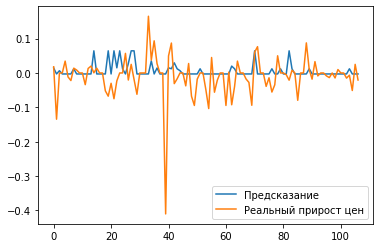

In [ ]:

regressor = GradientBoostingRegressor(max_depth=res_gp.x[0], learning_rate=res_gp.x[1], max_features=res_gp.x[2], min_samples_split=res_gp.x[3], min_samples_leaf=res_gp.x[4], n_estimators=res_gp.x[5])
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

pred_val(y_test, predictions)

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor

reg = HistGradientBoostingRegressor()
space  = [Integer(1, 5, name='max_depth'),
          Real(10**-5, 10**0, "log-uniform", name='learning_rate'),
          Integer(1, 100, name='min_samples_leaf')]

@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X_train, y_train, cv=5, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))

from skopt import gp_minimize
res_gp = gp_minimize(objective, space, n_calls=50, random_state=0)

print("Best score=%.4f" % res_gp.fun)

print("""Best parameters:
- max_depth=%d
- learning_rate=%.6f
- min_samples_leaf=%d""" % (res_gp.x[0], res_gp.x[1],
                            res_gp.x[2]))


Best score=0.0445
Best parameters:
- max_depth=1
- learning_rate=0.025981
- min_samples_leaf=13


MSE = 0.003901


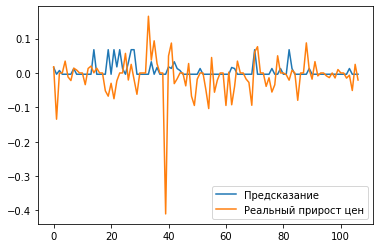

In [ ]:
regressor = HistGradientBoostingRegressor(max_depth=res_gp.x[0], learning_rate=res_gp.x[1], min_samples_leaf=res_gp.x[2])
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

pred_val(y_test, predictions)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

reg = AdaBoostRegressor(loss = 'linear')
space  = [Real(10**-5, 10**0, "log-uniform", name='learning_rate'),
          Integer(2, 100, name='n_estimators')]

@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X_train, y_train, cv=5, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))

from skopt import gp_minimize
res_gp = gp_minimize(objective, space, n_calls=50, random_state=0)

print("Best score=%.4f" % res_gp.fun)

print("""Best parameters:
- learning_rate=%.6f
- n_estimators=%d""" % (res_gp.x[0], res_gp.x[1]))


Best score=0.0482
Best parameters:
- learning_rate=0.000307
- n_estimators=8


MSE = 0.006605


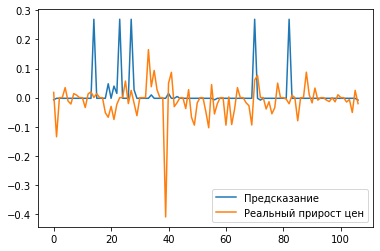

In [ ]:
regressor = AdaBoostRegressor(loss = 'linear', learning_rate=res_gp.x[0], n_estimators=res_gp.x[1])
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

pred_val(y_test, predictions)

In [ ]:
from sklearn.ensemble import BaggingRegressor

reg = BaggingRegressor(n_estimators=50, random_state=0)
space  = [Integer(1, 5, name='max_samples'),
          Integer(1, n_features, name='max_features'),
          Integer(1, 100, name='verbose'),
          Integer(2, 100, name='n_estimators')]

@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X_train, y_train,  cv=5, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))

from skopt import gp_minimize
res_gp = gp_minimize(objective, space, n_calls=50, random_state=0)

print("Best score=%.4f" % res_gp.fun)

print("""Best parameters:
- max_samples=%d
- max_features=%d
- verbose=%d
- n_estimators=%d""" % (res_gp.x[0], res_gp.x[1],
                            res_gp.x[2], res_gp.x[3]))


c:\Users\jama2\AppData\Local\Programs\Python\Python310\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Best score=0.0419
Best parameters:
- max_samples=1
- max_features=2
- verbose=9
- n_estimators=2


Building estimator 1 of 2 for this parallel run (total 2)...
Building estimator 2 of 2 for this parallel run (total 2)...
MSE = 0.003402


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


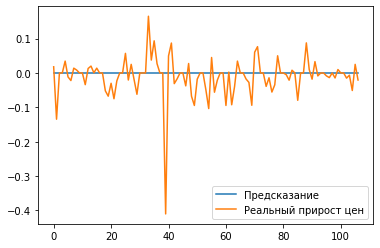

In [ ]:
regressor = BaggingRegressor(max_samples=res_gp.x[0], max_features=res_gp.x[1], verbose=res_gp.x[2], n_estimators=res_gp.x[3])
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

pred_val(y_test, predictions)

In [ ]:
from lineartree           import LinearBoostRegressor

reg = LinearBoostRegressor(base_estimator=LinearRegression(), loss = 'linear')
space  = [Integer(1, 5, name='max_depth'),
          Integer(1, n_features, name='max_features'),
          Integer(2, 100, name='min_samples_split'),
          Integer(1, 100, name='min_samples_leaf'),
          Integer(2, 100, name='n_estimators')]

@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X_train, y_train,  cv=5, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))

from skopt import gp_minimize
res_gp = gp_minimize(objective, space, n_calls=50, random_state=0)

print("Best score=%.4f" % res_gp.fun)

print("""Best parameters:
- max_depth=%d
- max_features=%d
- min_samples_split=%d
- min_samples_leaf=%d
- n_estimators=%d""" % (res_gp.x[0], res_gp.x[1],
                            res_gp.x[2], res_gp.x[3],
                            res_gp.x[4]))

Best score=0.0485
Best parameters:
- max_depth=2
- max_features=1
- min_samples_split=40
- min_samples_leaf=90
- n_estimators=46


MSE = 0.005077


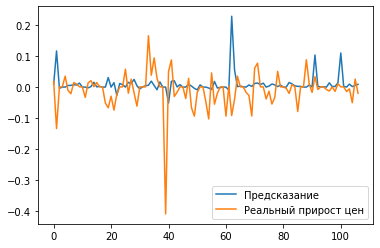

In [ ]:
regressor = LinearBoostRegressor(base_estimator=LinearRegression(),
                                 max_depth=res_gp.x[0], max_features=res_gp.x[1], min_samples_split=res_gp.x[2], min_samples_leaf=res_gp.x[3], n_estimators=res_gp.x[4])
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

pred_val(y_test, predictions)

In [ ]:
from sklearn.tree import DecisionTreeRegressor 

reg = DecisionTreeRegressor(random_state = 0) 
space  = [Integer(1, 5, name='max_depth'),
          Integer(1, n_features, name='max_features'),
          Integer(2, 100, name='min_samples_split'),
          Integer(1, 100, name='min_samples_leaf')]

@use_named_args(space)
def objective(**params):
    reg.set_params(**params)

    return -np.mean(cross_val_score(reg, X_train, y_train,  cv=5, n_jobs=-1,
                                    scoring="neg_mean_absolute_error"))

from skopt import gp_minimize
res_gp = gp_minimize(objective, space, n_calls=50, random_state=0)

print("Best score=%.4f" % res_gp.fun)

print("""Best parameters:
- max_depth=%d
- max_features=%d
- min_samples_split=%d
- min_samples_leaf=%d""" % (res_gp.x[0], res_gp.x[1],
                            res_gp.x[2], res_gp.x[3]))


Best score=0.0457
Best parameters:
- max_depth=2
- max_features=3
- min_samples_split=16
- min_samples_leaf=87


MSE = 0.003561


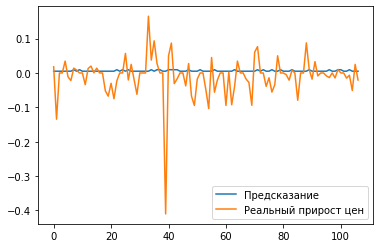

In [ ]:
regressor = DecisionTreeRegressor(max_depth=res_gp.x[0], max_features=res_gp.x[1], min_samples_split=res_gp.x[2], min_samples_leaf = res_gp.x[3])
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

pred_val(y_test, predictions)